# Предобработка данных (Data preprocessing) - создание хороших тренировочных наборов

Качество данных и объем полезной информации, которую они содержат, являются ключевыми факторами, которые определяют, как хорошо алгоритм машинного обучения сможет обучаться. Следовательно, крайне важно сначала набор данных обязательно проверить и подвергнуть предварительной обработке и только потом подавать его на вход обучаемого алгоритма.

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [17]:
data = pd.read_csv('data/station.csv', sep=',')
data.set_index('YEAR', inplace=True)

data.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
2015,27.82,27.62,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,28.02,999.90,999.90,999.90,999.90
2016,999.90,28.22,28.32,28.87,28.72,28.32,28.52,28.87,28.77,28.92,29.07,28.11,999.90,28.64,28.57,28.92,28.63
2017,27.51,27.36,27.11,27.71,28.61,28.71,28.51,28.86,29.21,28.61,28.66,28.56,27.66,27.81,28.69,28.83,28.25
2018,27.86,27.26,28.11,27.81,28.21,28.61,28.46,28.26,28.51,28.56,28.66,27.45,27.89,28.04,28.44,28.58,28.24
2019,27.60,27.20,27.35,27.90,28.40,28.50,28.80,28.85,28.90,28.50,999.90,999.90,27.42,27.88,28.72,28.75,28.19


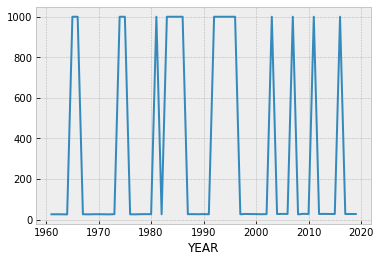

In [19]:
data['JAN'].plot()

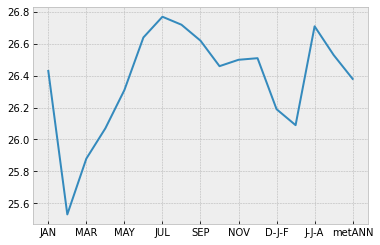

In [10]:
data.loc[1961].plot()

In [124]:
data.shape

(59, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1961 to 2019
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     59 non-null     float64
 1   FEB     59 non-null     float64
 2   MAR     59 non-null     float64
 3   APR     59 non-null     float64
 4   MAY     59 non-null     float64
 5   JUN     59 non-null     float64
 6   JUL     59 non-null     float64
 7   AUG     59 non-null     float64
 8   SEP     59 non-null     float64
 9   OCT     59 non-null     float64
 10  NOV     59 non-null     float64
 11  DEC     59 non-null     float64
 12  D-J-F   59 non-null     float64
 13  M-A-M   59 non-null     float64
 14  J-J-A   59 non-null     float64
 15  S-O-N   59 non-null     float64
 16  metANN  59 non-null     float64
dtypes: float64(17)
memory usage: 10.8 KB


isna - это чудо-метод, с помощью которого можно быстро найти пропущенные значения в датафрэйме. Применив его, на выходе мы получаем датафрэйм той же размерности, где в каждой ячейке True или False в зависимости от того было ли значение пропущено

In [21]:
data.isna()[:5]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1962,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1963,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1964,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1965,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
data.isna().sum()

JAN       0
FEB       0
MAR       0
APR       0
MAY       0
JUN       0
JUL       0
AUG       0
SEP       0
OCT       0
NOV       0
DEC       0
D-J-F     0
M-A-M     0
J-J-A     0
S-O-N     0
metANN    0
dtype: int64

Из этой информации мы уже можем видеть, что в наборе данных пустых значений нет.

### Сгенерируем пропуски, используя функцию pd.sample

Мы обычно рассматриваем пропущенные значения как пробелы в таблице данных, либо как строковые заполнители, такие как NaN (т.е. Not a number, не число)

In [25]:
data_nan = data.copy()
for i in range(10):
    random_part = data.sample(frac=0.05, axis=0).sample(n=1, axis=1)
    index = random_part.index
    col = random_part.columns[0]
    
    data_nan.loc[index, col] = np.NaN
    
data_nan.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.80,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,26.03,26.02,26.42,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,999.90,999.90,NaN,25.82,25.90,27.14,999.90,NaN
1965,999.90,999.90,999.90,999.90,999.90,999.90,NaN,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90


In [26]:
data_nan.isna().sum()

JAN       0
FEB       3
MAR       3
APR       3
MAY       0
JUN       3
JUL       3
AUG       0
SEP       3
OCT       0
NOV       3
DEC       3
D-J-F     0
M-A-M     0
J-J-A     3
S-O-N     0
metANN    3
dtype: int64

## Решение проблемы пропущенных значений

### Устранение строк/столбцов с пропущенными значениями

Один из самых простых способов решения проблемы пропущенных данных состоит в том, чтобы просто удалить соответствующие признаки (столбцы) или строки из набора данных полностью; строки с пропущенными значениями можно легко отбросить при помощи метода dropna.

In [100]:
df = data_nan.copy()
#df = df.dropna()[:5]

Точно так же можно отбросить столбцы, которые в любой строке имеют, по крайней мере, одно значение Nan.

In [101]:
#df = df.dropna(axis =1)[:5]

In [102]:
df.isna().sum()

Month         0
Sunspot    1134
dtype: int64

Метод dropna имеет несколько дополнительных параметров, которые могут пригодиться

In [ ]:
# отбросить строки, только если все столбцы содержат NaN
df.dropna(how='all')

In [ ]:
# отбросить строки, если в них менее 4 значений не Nan
df.dropna(thresh=4)

Нередко удаление строк или отбрасывание всех признаковых столбцов просто недопустимо, потому что можно потерять слишком много ценных данных. В этом случае можно воспользоваться различными методами интерполяции для оценки пропущенных значений.

### Imputation methods

**Imputation** - процесс замещения пропущенных, некорректных или несостоятельных значений другими значениями

In [130]:
data_with_mean = data_nan.fillna(data_nan.mean(axis=0))
data_with_mean.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.530000,252.832679,26.070000,26.31,26.640000,26.77,26.72,26.62,26.4600,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.060000,26.150000,26.040000,26.83,26.740000,26.71,26.94,26.87,357.5625,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,287.550357,26.020000,320.910755,27.17,26.940000,26.93,26.98,26.96,26.8500,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.520000,25.410000,320.910755,26.55,284.362642,27.16,27.34,27.32,999.9000,999.90,999.90,25.82,25.90,27.14,999.90,26.39
1965,999.90,999.900000,252.832679,999.900000,999.90,284.362642,999.90,999.90,999.90,999.9000,999.90,999.90,999.90,999.90,999.90,999.90,999.90


In [131]:
data_with_median = data_nan.fillna(data_nan.median(axis=0))
data_with_median.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.530,27.235,26.07,26.31,26.64,26.77,26.72,26.62,26.460,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.060,26.150,26.04,26.83,26.74,26.71,26.94,26.87,28.515,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,27.295,26.020,27.71,27.17,26.94,26.93,26.98,26.96,26.850,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.520,25.410,27.71,26.55,27.86,27.16,27.34,27.32,999.900,999.90,999.90,25.82,25.90,27.14,999.90,26.39
1965,999.90,999.900,27.235,999.90,999.90,27.86,999.90,999.90,999.90,999.900,999.90,999.90,999.90,999.90,999.90,999.90,999.90


Замена пропущенных значений средним, медианой или модой — грубый способ работы с ними. В зависимости от ситуации, например, если вариация данных невелика, или эта переменная мало влияет на выходную, такая грубая аппроксимация, возможно, приемлема и даст удовлетворительные результаты.

### Interpolation methods

Функция Pandas **dataframe.interpolate()** в основном используется для заполнения значений NaN в кадре данных или серии. Но это очень мощная функция для заполнения пропущенных значений. Он использует различные методы интерполяции, чтобы заполнить пропущенные значения, а не жестко кодировать значение.

Интерполяция – способ нахождения промежуточных значений
величины по имеющемуся дискретному набору известных значений.

In [138]:
data_inter_linear = data_nan.interpolate(method='linear').fillna(0)

data_inter_linear.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.53,0.000,26.07,26.31,26.64,26.77,26.72,26.62,26.460,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.06,26.150,26.04,26.83,26.74,26.71,26.94,26.87,26.655,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,25.79,26.020,350.66,27.17,26.94,26.93,26.98,26.96,26.850,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.52,25.410,675.28,26.55,351.26,27.16,27.34,27.32,999.900,999.90,999.90,25.82,25.90,27.14,999.90,26.39
1965,999.90,999.90,512.655,999.90,999.90,675.58,999.90,999.90,999.90,999.900,999.90,999.90,999.90,999.90,999.90,999.90,999.90


In [139]:
data_inter_nearest = data_nan.interpolate(method='nearest').fillna(0)

data_inter_nearest.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.53,0.00,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.46,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,26.06,26.02,26.04,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.52,25.41,999.90,26.55,26.94,27.16,27.34,27.32,999.90,999.90,999.90,25.82,25.90,27.14,999.90,26.39
1965,999.90,999.90,25.41,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90


### Smoothing methods

Astropy - библиотека Python, созданная для проведения астрономических расчетов

In [140]:
from astropy.convolution import convolve, Gaussian1DKernel

In [143]:
gauss_kernel = Gaussian1DKernel(2)
data_smoothed = data_nan.apply(lambda r: convolve(data_nan[r.name].values, gauss_kernel), axis=0)
data_smoothed.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,50.570751,54.134783,23.568501,56.539286,51.231029,24.350244,50.887092,50.934948,53.057113,132.418323,113.838872,113.781354,50.546854,50.982197,50.892126,113.849807,50.704703
1962,109.679541,129.840566,52.900480,147.927874,112.185731,51.658652,110.116041,110.182349,118.680457,277.827344,227.777338,227.677491,109.675517,111.858175,110.124693,227.782744,109.883715
1963,204.333600,259.125127,105.563457,325.087035,213.278225,112.489056,204.836654,204.909023,231.168447,450.645666,376.070146,375.938634,204.351758,212.920200,204.846352,376.064457,204.581976
1964,314.361482,407.635717,179.759502,529.776540,341.038851,213.642588,314.842499,314.904387,377.950582,575.202050,508.903760,508.765093,314.390634,340.711336,314.851315,508.882787,314.605091
1965,391.509808,513.393353,247.152203,635.646742,454.884052,300.548870,391.896044,391.938015,509.748418,600.254841,563.187898,563.127887,391.536224,454.626340,391.906039,563.148008,391.711091


### Результаты

In [144]:
datas = [data_with_mean, data_inter_linear, data_inter_nearest, data_smoothed]
names = ['MEAN', 'LINEAR', 'NEAREST', 'SMOOTHED']
results = pd.Series(index=names)

for data_, name in zip(datas, names):
    results[name] = np.sqrt(np.mean((data - data_)**2, axis=0).mean())

results = results.sort_values(ascending=True)

results

LINEAR       70.354565
MEAN         81.931527
NEAREST      92.136422
SMOOTHED    326.978184
dtype: float64

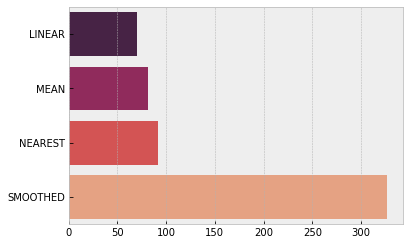

In [145]:
sns.barplot(y=results.index, x=results.values, palette='rocket', orient='h');

Из графика видно, что линейная интерполяция дала лучший результат.